In [15]:
import os
import random
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
train_path = os.path.join ('devanagari', 'train')
test_path = os.path.join ('devanagari', 'test')

In [17]:
filenames = os.listdir (train_path)

cls_table = { i: filename for i, filename in enumerate (filenames) if filename[0] != '.' }
cls_id = { filename: i for i, filename in enumerate (filenames) if filename[0] != '.' }

In [18]:
def load_dataset (train_path, test_path):
    data = list ()
    labels = list ()
    
    for split in [train_path, test_path]:
        for cls_folder in os.listdir (split):
            if cls_folder[0] == '.': continue
            for file in os.listdir (os.path.join (split, cls_folder)):
                if file[0] == '.': continue
                labels.append (cls_id[cls_folder])
                data.append (os.path.join (split, cls_folder, file))
                
    combined = list (zip (data, labels))
    random.shuffle (combined)
    data, labels = zip (*combined)
    
    train_data, test_data, train_labels, test_labels = train_test_split (data, labels, test_size=0.3, random_state=42)
    
    return train_data, test_data, train_labels, test_labels

In [19]:
train_data, test_data, train_ytrue, test_y_true = load_dataset (train_path, test_path)

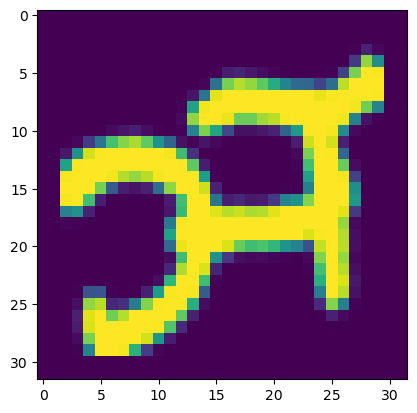

In [20]:
image = Image.open (train_data[random.randint (0, len (train_data))])
plt.imshow (image)

In [22]:
H, W = (32, 32)
n_class = 36
epochs = 100

In [29]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset

from torchvision import transforms

In [27]:
transform = transforms.Compose ([
    transforms.ToTensor ()
])